## Surfing the Bitcoin Waves: Comprehensive Trend Forecasting with Various Trader Types
#### -Can Ali Ateş
#### -Emre Çoban

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset

## 1.1 Dataset Explanation

The dataset is a combination of 8 different CSV files.

1. **klines:** The dataset has “Open”, “Close”, “High” and “Low” price features for the Bitcoin stock market.
2. **botTracker:** The dataset has an “estimatedBotCount” feature which indicates the prediction of bot activity based on the searching for frequently occurring unique order sizes.
3. **binanceGlobalAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of accounts that are long or short strategy on Binance.
4. **binanceTopTraderAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top trader accounts (top %20) that are long or short strategies on Binance.
5. **binanceTopTraderPositions:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top traders positions (top %20) that are long or short strategy on Binance.
6. **binanceWhaleRetailDelta:** The dataset has a “WhaleRetailPositionDelta” feature that indicates the difference between the percentage of long positions held by top trader accounts ("whales") and the percentage of long positions held by global accounts ("retail").
7. **buyVolume:** The dataset has a “BuyingOrderQuantity” feature that indicates the quantity of buying orders executed during a specified period.
8. **sellVolume:** The dataset has a “SellingOrderQuantity” feature that indicates the quantity of selling orders executed during a specified period.

In [6]:
# Define the CSV files
data_files = ["klines", "botTracker", "binanceGlobalAccounts", "binanceTopTraderAccounts", 
              "binanceTopTraderPositions", "binanceWhaleDelta", "buyVolume", "sellVolume"]

## 1.2 Dataset Visualization

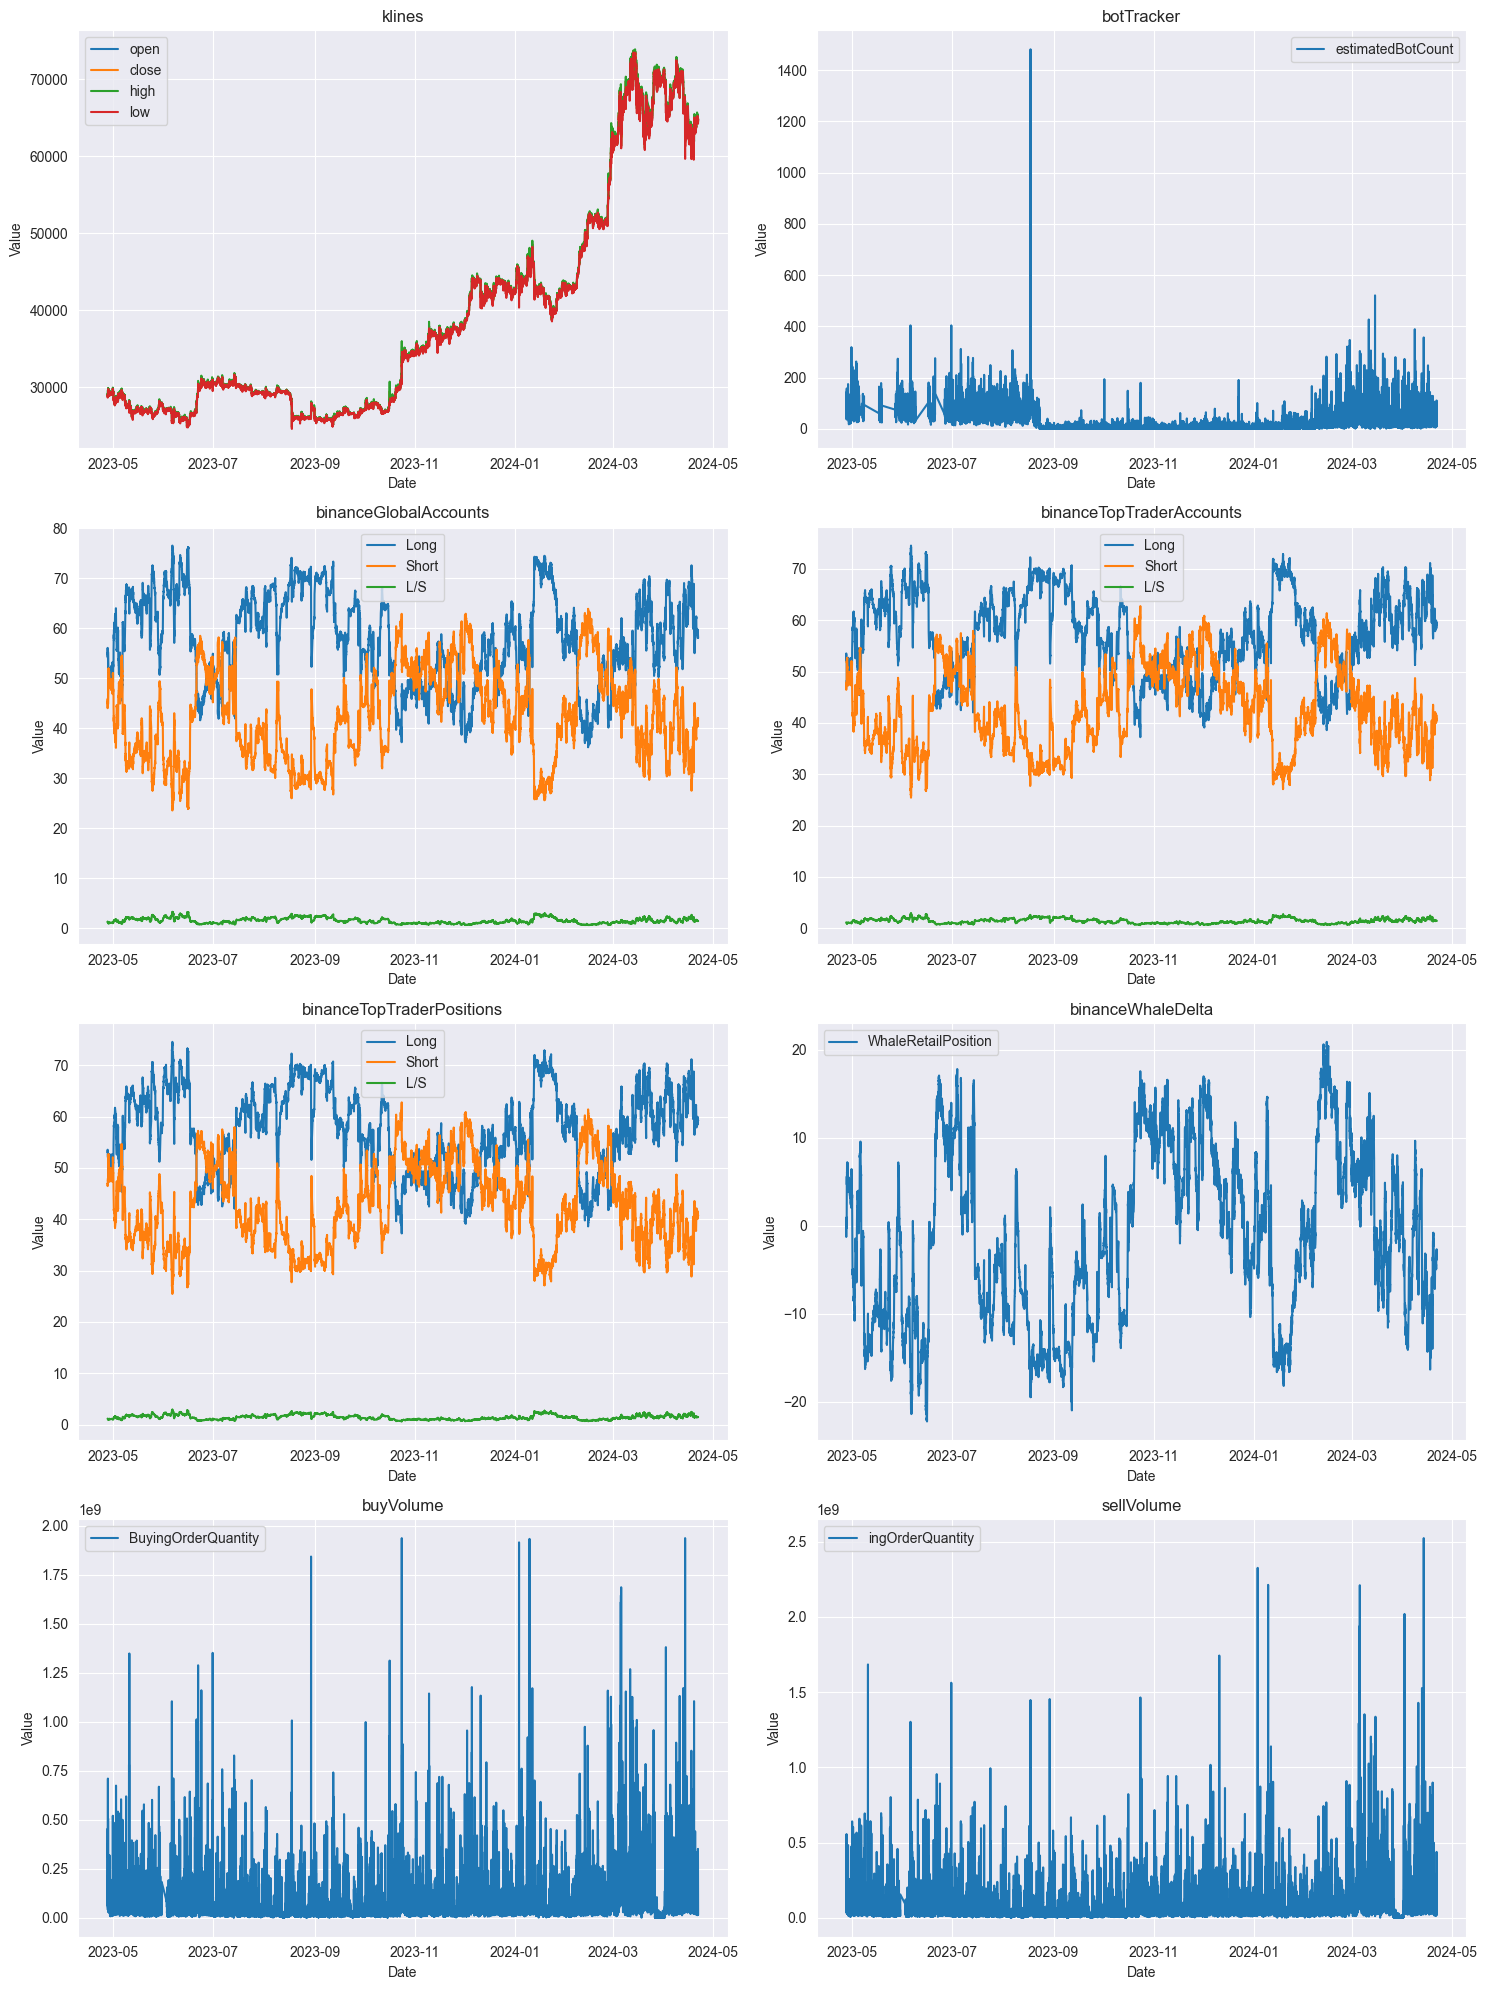

In [11]:
def plot_csv(filename:str, ax:plt.axes):
    # Read the CSV file
    data = pd.read_csv(f"data/{filename}15mins.csv", header=0)
    # Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    # Plot the data
    for column in data.columns[1:]:
        ax.plot(data['Date'], data[column], label=column)
    ax.set_title(f'{filename}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

def plot_data(files:list):
    # Create a subplot grid to plot all data files
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))
    # Iterate over each data file and plot them into subplot grid
    for i, csv_file in enumerate(files):
        plot_csv(filename=csv_file, ax=axs[i // 2, i % 2])
    # Display the plots
    plt.tight_layout()
    plt.show()

plot_data(data_files)

## Missing Values <a id = "2"></a>

In [49]:
# Print total missing value counts for each feature and interval
def print_missing_values(filename:str, interval:str):
    """
    Print missing values of a DataFrame for a given filename and interval.

    Parameters:
    - filename (str): The name of the file.
    - interval (str): The interval (e.g., 'Hourly', '15mins').
    """
    # Read the CSV file
    data = pd.read_csv(f"data/{filename}{interval}.csv")

    total_missing_values = data.isnull().sum().sum()
    print(f"Total Missing Values for {filename} ({interval}): {total_missing_values}\n")

for file in files:
    for interval in intervals:
        print_missing_values(file, interval)

Total Missing Values for botTracker (Hourly): 0

Total Missing Values for botTracker (15mins): 0

Total Missing Values for binanceGlobalAccounts (Hourly): 0

Total Missing Values for binanceGlobalAccounts (15mins): 0

Total Missing Values for binanceTopTraderAccounts (Hourly): 0

Total Missing Values for binanceTopTraderAccounts (15mins): 0

Total Missing Values for binanceTopTraderPositions (Hourly): 0

Total Missing Values for binanceTopTraderPositions (15mins): 0

Total Missing Values for sellVolume (Hourly): 0

Total Missing Values for sellVolume (15mins): 0

Total Missing Values for buyVolume (Hourly): 0

Total Missing Values for buyVolume (15mins): 0

Total Missing Values for binanceWhaleDelta (Hourly): 0

Total Missing Values for binanceWhaleDelta (15mins): 0

Total Missing Values for klines (Hourly): 0

Total Missing Values for klines (15mins): 0



### Statistics of data

In [50]:

def print_dataframe_info(filename:str, interval:str):
    """
    Print information about the DataFrame for a given filename and interval.

    Parameters:
    - filename (str): The name of the file.
    - interval (str): The interval (e.g., 'Hourly', '15mins').
    """
    data = pd.read_csv(f"data/{filename}{interval}.csv")

    # Print basic information
    print(f"Basic information for {filename} ({interval}):")
    print(data.info())
    print("\n")

    # Print basic statistics
    print(f"Basic statistics for {filename} ({interval}):")
    print(data.describe())
    print("\n")
    print("-" * 60)


for file in files:
    for interval in intervals:
        print_dataframe_info(file, interval)

Basic information for botTracker (Hourly):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8381 entries, 0 to 8380
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               8381 non-null   object
 1   estimatedBotCount  8381 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 131.1+ KB
None


Basic statistics for botTracker (Hourly):
       estimatedBotCount
count        8381.000000
mean          149.152130
std           164.789079
min             0.000000
25%            20.000000
50%            75.000000
75%           253.000000
max          2264.000000


------------------------------------------------------------
Basic information for botTracker (15mins):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31376 entries, 0 to 31375
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               31376

#### Visualizing Boxplots To Detect Outliers

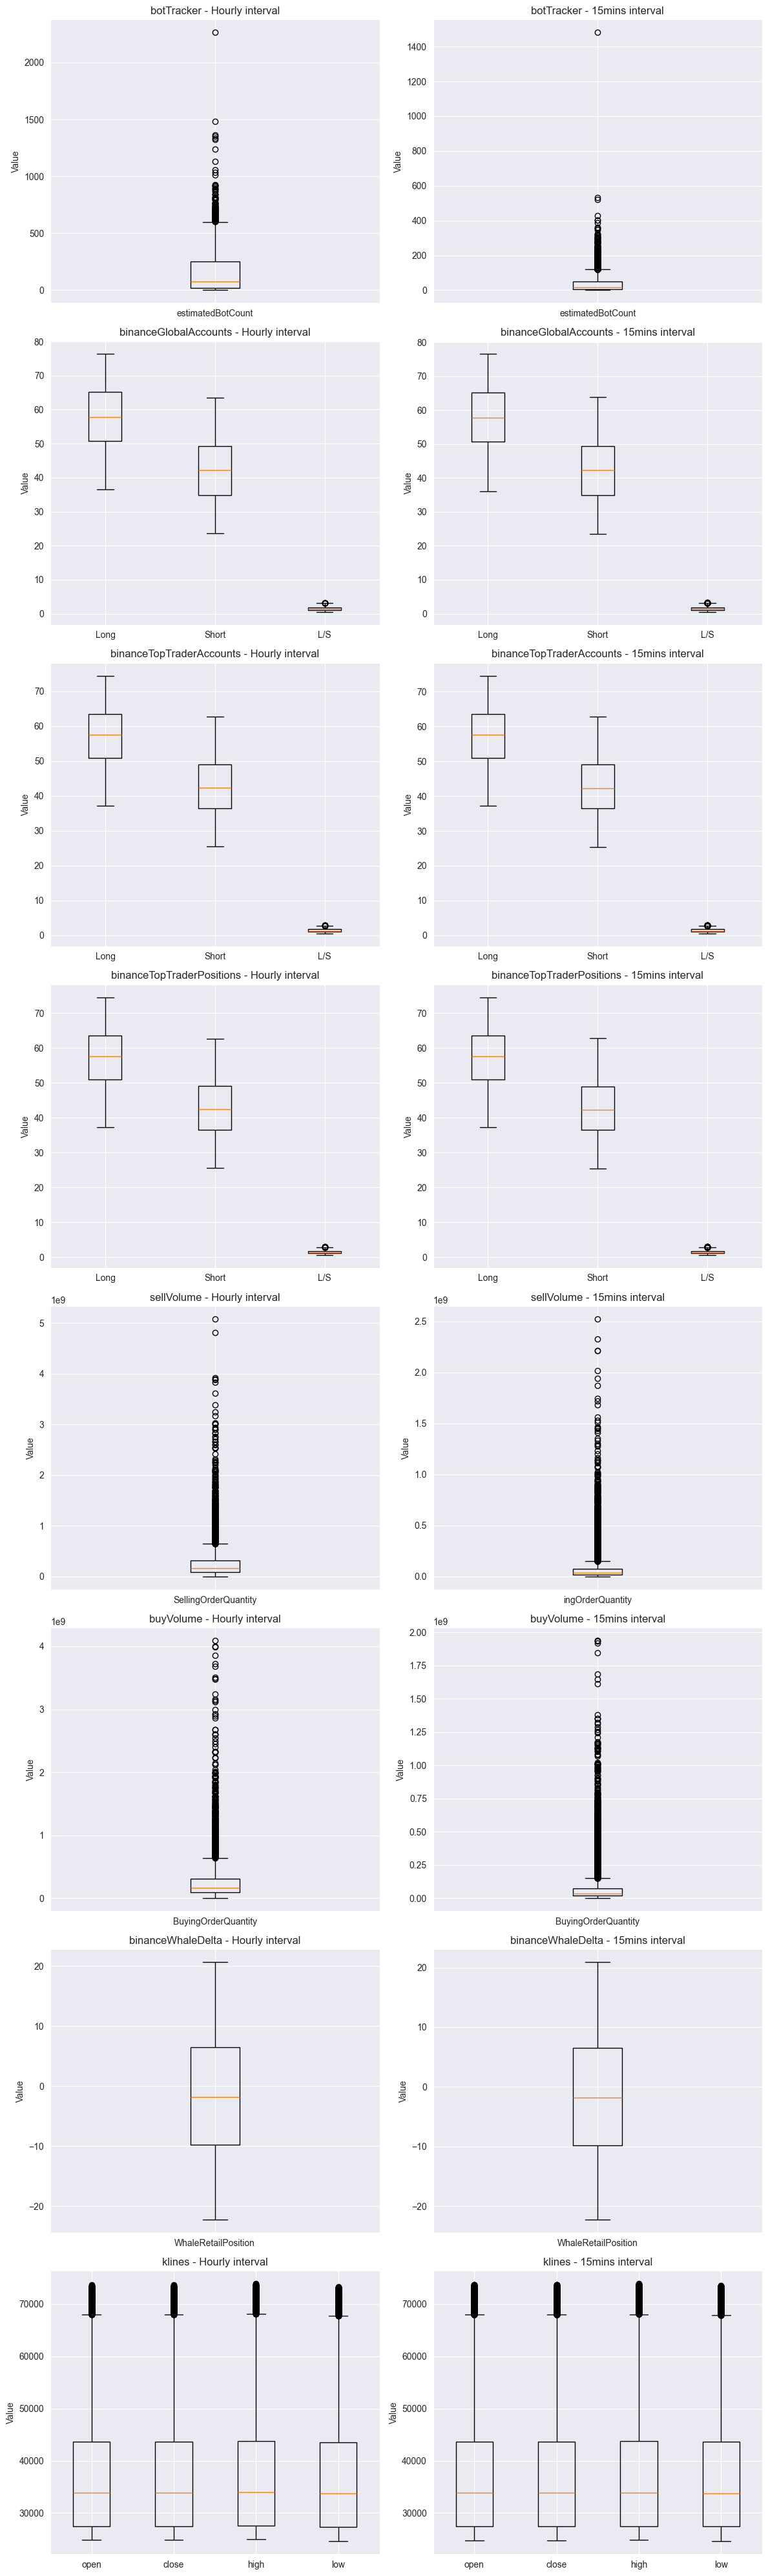

In [51]:
def plot_boxplots(files: list, intervals: list):
    """
    Plot boxplots for each feature in the specified time series datasets.

    Parameters:
    - files (list): List of file names.
    - intervals (list): List of intervals (e.g., ["15mins", "Hourly"]).
    """
    # Create subplots with the determined number of rows and two columns
    fig, axs = plt.subplots(len(files), len(intervals), figsize=(12, 5 * len(files)))

    for j, interval in enumerate(intervals):
        for i, file in enumerate(files):
            # Read the CSV file
            data = pd.read_csv(f"data/{file}{interval}.csv")

            # Exclude the "Date" column
            if "Date" in data.columns:
                data = data.drop(columns=["Date"])

            # Plot boxplot for the current file and interval
            axs[i, j].boxplot(data.values, labels=data.columns)
            axs[i, j].set_title(f"{file} - {interval} interval")
            axs[i, j].set_ylabel("Value")

    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.tight_layout()
    plt.show()

plot_boxplots(files, intervals)

### Data Preprocessing(cont.)